Classification is the task consisting of learning the labels ('classes') of an attribute using data with all features and labels ('training data'), such that you can predict the label when given only the features ('testing data'). 
For instance, imagine that your data has four columns: attendsClass, paysAttention, takeMidterm, passesCourse. The first three attributes are the features, and we want to use them to predict the class of the fourth attribute ("yes" or "no" to being a passesCourse). To build a classifier, you'd provide the computer with training data where we have the three features and the class for many students. Then, given only the three features, you can predict the class of any new student you're given. 

But what if the training data has 85% of "passedCourse=yes"? Then, the classifier could just predict "yes" no matter what the features are, because it's still right most of the time. Conversely, if 90% of the students are in the "no" class, the classifier may just learn to output "no" regardless of the feature values. In other words, __a lack of balance in the class outcomes can bias a classifier toward the most frequent class__. That <font color='red'>bias must be avoided</font>.

### Part 1
# 1. Exploring Features

Your data for this lab is provided with the notebook as "studyData.csv". As usual, the dataset consists of features provided as columns (which are questions in a questionnaire) and entries given as rows (which are a person's set of answers to the questionnaire).

We have missing data, more columns than we need, and so on. So we start by doing a little bit of cleaning. Since cleaning is not the focus of this lab, we'll do the bare minimum to get going. For a better job, refer to the previous lab and fitting distributions.

> ___Milestone 1___
>
> Your clean dataset should:
> * start with the three attributes cp17i010, cp17i011, and cp17i019 renamed as Happiness, Satisfaction, and Trust respectively. <i>These are the three attributes that we'll eventually want to predict as a function of other columns</i>, so it's better to move them at one specific part of the file (either start or end) and flag them with names that don't look like other attributes.
> * end with attributes cp17i020 <font color='red'><b>to</b></font> cp17i069, which we'll use as features. <i>Carefully note that I am not saying cp17i020 'and' cp17i069. I am saying: starting at cp17i020, take all attributes, all the way to cp17i069.</i>
> * discard any attribute other than the ones aforementioned. 
> * drop any entry (=row) with missing data.
> * change the features' values from their current range of [0, 5] to [-2, 2]. The rationale is that the numbers represent the answers "very inaccurate" (1), "moderately inaccurate" (2), neutral (3), moderately accurate (4), and very accurate (5). Representing neutral by 0, inaccurate (=bad) by negative and accurate (=good) by negative helps to track the meaning of the numbers better than 0-5.
>
> <font color='red'>Be careful that there is a whole list of things to do. Each bit will matter for the next step. So carefully go through the list as a 'check list' before moving onto milestone 2.</font>

Your code starts below.

---
---

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

data = pd.read_csv('studyData.csv')
#your code continue belows

#Hint: there is a function data.rename, which MUST be applied inplace


#Hint: to drop rows with missing values, you can use an applymap that turns ' ' into float('nan')...

# ...and then just do a dropna()

#Hint: use a map to shift from [0, 5] to [-2, 2]. Be careful that data may be read as string
#but you mean to use it as integers (hence typecasting).

#Hint: Convert happiness, satisfaction, and trust to ints by applying .astype(int) on each column

In [25]:
####This is one the data should look like ONCE YOU HAVE FIXED IT.
data.head()

,Happiness,Satisfaction,Trust,cp17i020,cp17i021,cp17i022,cp17i023,cp17i024,cp17i025,cp17i026,...,cp17i060,cp17i061,cp17i062,cp17i063,cp17i064,cp17i065,cp17i066,cp17i067,cp17i068,cp17i069
0,8,9,4,0,-2,-1,-2,-1,0,-1,...,-2,-2,0,0,-1,0,-1,0,-1,-2
1,8,8,8,-2,-2,-1,-1,-1,-1,-1,...,-2,-1,-1,-2,-1,-2,-2,-2,-2,0
2,9,9,9,-2,-1,0,-2,-2,-1,-2,...,-2,-2,-2,0,-2,0,-2,-2,-1,-2
3,8,8,7,-2,-2,-2,-2,-1,-1,-1,...,-2,-2,-2,0,-2,-1,-1,0,-2,-1
4,8,8,8,-1,-1,0,-2,-1,-2,-1,...,-2,0,0,0,-2,-2,0,-2,-2,-1


At this point, your features are ready, and your three classes are in the right place with the right names. The classes have numerical values from 1 up to 10. If we wanted to predict a number based on features, it would be a <i>regression</i> and not a <i>classification</i> task. But today, we are interested in classification. Thus, we'll need to transform these numbers into class outcomes that can be handled in a classification. We'll start looking at the numbers (i.e. plot histograms), and then we'll use the histogram to reduce the 10 values down to three class outcomes. 

The code below shows how you can plot three histograms on the same figure:

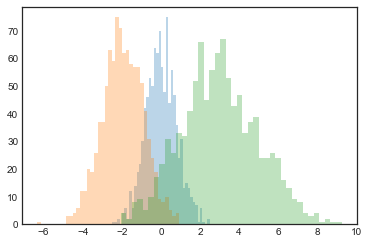

In [133]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white') #the seaborn style is more sleek than the default one

x1 = np.random.normal(0, 0.8, 1000) #makes some dummy data so we have something to plot. YOU have REAL data!
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40) #alpha=transparency

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

> ___Milestone 2___
>
> <font color='red'>On one figure, show the distribution for our three classes. </font>

Your aesthetic code starts below.

---
---

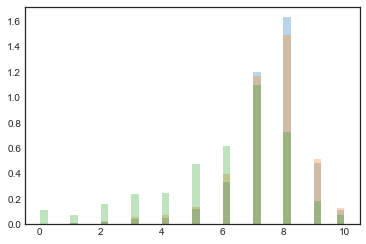

In [4]:
#This is what you should get when you run your code

<font color='blue'><b><i>Just so you know...</i></b></font> Matplotlib is nice, but you wouldn't use it in a professional environment. It can be __nicer__. For professional rendering, you'd use Seaborn rather than matplotlib, and you'd plot the empirical distribution (KDE or 'Kernel Density Function') in addition to the bins. Here is some code as example:

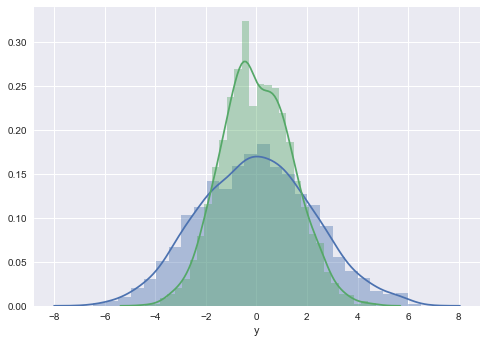

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() #sets Seaborn's own pretty style. Without this line, it'd look like matplotlib

#makes up some data for plotting
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

#uses Seaborn to show the distribution with both bins and kde
sns.distplot(data['x'])
sns.distplot(data['y']);

Now that we're done making pretty pictures for reports, we can actually start running some stats! By reducing the values from 10 numbers down to three categories, we could actually perform classification instead of having to use regression. 

<b>Our goal is to reduce the values</b> as follows:
* Happiness should have the values 'happy', 'unhappy', 'neutral'
* Satisfaction should have the values 'satisfied', 'unsatisfied', 'neutral'
* Trust should have the values 'trustful', 'distrust', 'neutral'

In each case, we'd like the positive category to represent roughly the top 40% of respondents, neutral to represent the next 20%, and the negative category to represent the bottom 40% of respondents. For example, if 40% of respondents on 'happiness' have a value from 7 to 10 then we would replace such values by 'happy'. If 20% have a value from 4 to 6, these values would be 'neutral'. And finally, values from 1 to 3 would be 'unhappy'. 

You _could_ figure out these cutoff values by looking at the histogram and adding the bins yourself. But the finer the distribution gets, and the more time consuming it would be. So you're better off coding it once and for all.

> ___Milestone 3___
>
> Write a function ```find_breaks``` that takes as argument a column of data, and returns the three cutoffs (bottom 40%; next 20%; next 40%). Note that these cut-off might not be exact, since the distribution here isn't particularly granular. See the next code cell to get a feeling as to how these cutoffs are meant to be used.
>
><it>Hint:</it> ```counts, bin_edges = np.histogram(data, bins=10)``` _gives you the bins and their counts, so you can compute them for each attribute and <font color='blue'>perform a running sum</i> to identify when you reach 40% or 20%._

Impressive code starts below.

---
---

In [2]:
def find_breaks(name_of_data):
    pass #remove this line and start writing your own code

In [28]:
#here is an example of how to use your function and what it should return
one, two, three = find_breaks(data['Trust'])
print(one,two,three)

6.0 7.0 9.0


In [ ]:
#The following would apply your code to transform the data. You don't need to change anything. Just run it.

#happiness
one, two, three = find_breaks(data['Happiness'])
data['Happiness']=data['Happiness'].map(
    lambda x: "unhappy" if x<one else("neutral" if x<two else "happy" ) )


#satisfaction
one, two, three = find_breaks(data['Satisfaction'])
data['Satisfaction']=data['Satisfaction'].map(
    lambda x:"unsatisfied" if x<one else("neutral" if x<two else "satisfied" ))


#trust
one, two, three = find_breaks(data['Trust'])
data['Trust']=data['Trust'].map(
    lambda x:"distrust" if x<one else("neutral" if x<two else "trust" ))


In [30]:
#check that your script worked! For any of the columns, we should have distrust/trust/neutral
data['Trust'].unique()

array(['distrust', 'trust', 'neutral'], dtype=object)

In [31]:
data #here is what your complete dataset should look like at that stage

,Happiness,Satisfaction,Trust,cp17i020,cp17i021,cp17i022,cp17i023,cp17i024,cp17i025,cp17i026,...,cp17i060,cp17i061,cp17i062,cp17i063,cp17i064,cp17i065,cp17i066,cp17i067,cp17i068,cp17i069
0,happy,satisfied,distrust,0,-2,-1,-2,-1,0,-1,...,-2,-2,0,0,-1,0,-1,0,-1,-2
1,happy,satisfied,trust,-2,-2,-1,-1,-1,-1,-1,...,-2,-1,-1,-2,-1,-2,-2,-2,-2,0
2,happy,satisfied,trust,-2,-1,0,-2,-2,-1,-2,...,-2,-2,-2,0,-2,0,-2,-2,-1,-2
3,happy,satisfied,trust,-2,-2,-2,-2,-1,-1,-1,...,-2,-2,-2,0,-2,-1,-1,0,-2,-1
4,happy,satisfied,trust,-1,-1,0,-2,-1,-2,-1,...,-2,0,0,0,-2,-2,0,-2,-2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6094,unhappy,unsatisfied,distrust,-2,-1,-1,-1,-1,0,-2,...,-2,0,-2,-1,-1,0,0,0,-2,0
6095,happy,satisfied,trust,0,-2,0,-2,-2,-1,-2,...,-1,-2,0,-1,0,-2,-2,0,-2,0
6096,neutral,neutral,distrust,-2,-1,0,-2,0,-1,-2,...,-2,-2,0,-2,-2,-1,-2,-2,0,-2
6097,happy,satisfied,neutral,-2,-2,0,0,-2,-1,-2,...,-1,-2,0,-1,0,-2,-2,0,-1,0


In [1]:
import pandas as pd
import numpy as np

In [2]:
x = [2, 5, 10, 11, 15, 21, 31, 32, 35, 39, 42, 48, 62, 71, 79, 81]